The kNN classifier consists of two stages:

- During training, the classifier takes the training data and simply remembers it
- During testing, kNN classifies every test image by comparing to all training images and transfering the labels of the k most similar training examples
- The value of k is cross-validated


Classify the test data with the kNN classifier:
1. First we must compute the distances between all test examples and all train examples. 
2. Given these distances, for each test example we find the k nearest examples and have them vote for the label

In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function # 把下一个新版本的特性导入到当前版本，就可以在当前版本中测试一些新版本的特性

In [56]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # 设置 size
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# notebook 会 reload外部python modules
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- load data

In [62]:
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print ('X_train shape:  ',X_train.shape)
print ('y_train shape:  ',y_train.shape)
print ('X_test shape:  ',X_test.shape)
print ('y_test shape:  ',y_test.shape)

X_train shape:   (50000, 32, 32, 3)
y_train shape:   (50000,)
X_test shape:   (10000, 32, 32, 3)
y_test shape:   (10000,)


- 可视化 不同类别的image

y, cls: 0 plane
     i, idx: 0 9759
                 plt_idx: 1
     i, idx: 1 44866
                 plt_idx: 11
     i, idx: 2 33728
                 plt_idx: 21
     i, idx: 3 4821
                 plt_idx: 31
     i, idx: 4 48355
                 plt_idx: 41
y, cls: 1 car
     i, idx: 0 21615
                 plt_idx: 2
     i, idx: 1 16276
                 plt_idx: 12
     i, idx: 2 15961
                 plt_idx: 22
     i, idx: 3 29176
                 plt_idx: 32
     i, idx: 4 6356
                 plt_idx: 42
y, cls: 2 bird
     i, idx: 0 29126
                 plt_idx: 3
     i, idx: 1 5862
                 plt_idx: 13
     i, idx: 2 15262
                 plt_idx: 23
     i, idx: 3 26425
                 plt_idx: 33
     i, idx: 4 3297
                 plt_idx: 43
y, cls: 3 cat
     i, idx: 0 44530
                 plt_idx: 4
     i, idx: 1 35246
                 plt_idx: 14
     i, idx: 2 20868
                 plt_idx: 24
     i, idx: 3 4737
                 plt_idx: 34
 

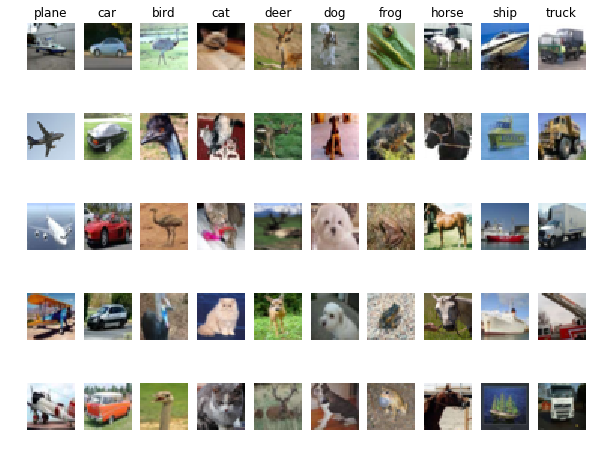

In [5]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_each_class = 5

for y, cls in enumerate(classes):   # 枚举
    print ('y, cls:',y, cls)
    idxs = np.flatnonzero(y_train == y) #找出标签中y类的位置
    idxs = np.random.choice(idxs, sample_each_class, replace=False) #从中随机选出5个image
    for i, idx in enumerate(idxs):
        print ("     i, idx:",i, idx)
        
        plt_idx = i * num_classes + y + 1  # 计算 图像 应该放在 5 x 10 的哪个位置
        print ('                 plt_idx:',plt_idx)
        
        plt.subplot(sample_each_class, num_classes, plt_idx) # 在5x10 的第plt_idx个位置 
        plt.imshow(X_train[idx].astype('uint8'))  # 显示idx对用的图像
        plt.axis('off') 
        if i == 0:
            plt.title(cls)
plt.show()



- subsample
    
    本练习中 使用 5000 train 和500 test

In [65]:
num_training = 5000  # 从 50000 中 抽取 500 
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500  # 从 10000 中 抽取 50 
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

print ('X_train shape:  ',X_train.shape)
print ('y_train shape:  ',y_train.shape)
print ('X_test shape:  ',X_test.shape)
print ('y_test shape:  ',y_test.shape)

X_train shape:   (5000, 32, 32, 3)
y_train shape:   (5000,)
X_test shape:   (500, 32, 32, 3)
y_test shape:   (500,)


- reshape the image into rows

In [66]:
X_train = np.reshape(X_train, (X_train.shape[0],-1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

print ('X_train shape:  ',X_train.shape)
print ('y_train shape:  ',y_train.shape,y_train)
print ('X_test shape:  ',X_test.shape)
print ('y_test shape:  ',y_test.shape)

X_train shape:   (5000, 3072)
y_train shape:   (5000,) [6 9 9 ..., 5 4 6]
X_test shape:   (500, 3072)
y_test shape:   (500,)


###  Create a kNN classifier instance

In [67]:
from classifiers.k_nearest_neighbor import KNearestNeighbor # 需  pip install future

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

- 计算 距离矩阵 between all training and test examples. 

Nte test examples * Ntr training examples

In [74]:
# compute_distances_no_loops
dists_no = classifier.compute_distances_no_loops(X_test)
print(dists.shape)
print(dists[1])

(500, 5000)
[ 6336.83367306  5270.28006846  4040.63608854 ...,  4829.15334194
  4694.09767687  7768.33347636]


In [101]:
# compute_distances_one_loops
dists_one = classifier.compute_distances_one_loops(X_test)
print(dists.shape)
print(dists[1])

(500, 5000)
[ 6336.83367306  5270.28006846  4040.63608854 ...,  4829.15334194
  4694.09767687  7768.33347636]


In [94]:
# compute_distances_two_loops
dists_two = classifier.compute_distances_two_loops(X_test)
print(dists_two.shape)
print(dists[1])

(500, 5000)
[ 6336.83367306  5270.28006846  4040.63608854 ...,  4829.15334194
  4694.09767687  7768.33347636]


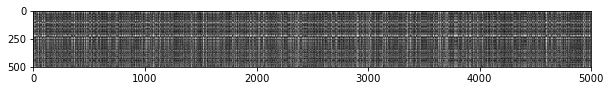

In [86]:
# visualize the distance matrix
plt.imshow(dists_two, interpolation='none')
plt.show()

# black -- low distances
# while -- high distance

-  Compute and print the fraction of correctly predicted examples

In [95]:
y_test_pred = classifier.predict_labels(dists_two, k = 1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print ("Got %d / %d correct ==> accuracy: %f"  %(num_correct, num_test, accuracy))

Got 137 / 500 correct ==> accuracy: 0.274000


In [96]:
y_test_pred = classifier.predict_labels(dists_two, k = 5)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print ("Got %d / %d correct ==> accuracy: %f"  %(num_correct, num_test, accuracy))

Got 119 / 500 correct ==> accuracy: 0.238000


- 检查 两个 dist 矩阵是否相似; 最简单的是Frobenius规范

In [102]:
#dists_one = classifier.compute_distances_one_loops(X_test)


difference = np.linalg.norm(dists_two - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))

if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 551335735.545133
Uh-oh! The distance matrices are different


In [98]:
dists_no = classifier.compute_distances_no_loops(X_test)

difference = np.linalg.norm(dists_two - dists_no, ord='fro')
print('Difference was: %f' % (difference, ))

if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


- compare how fast the implementations are

In [99]:
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    
    import time
    start = time.time()
    f(*args)
    end = time.time()
    return end - start


In [100]:
two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print ('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loops, X_test)
print ('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print ('No loop version took %f seconds' % no_loop_time)

Two loop version took 33.369467 seconds
One loop version took 78.786293 seconds
No loop version took 0.432292 seconds


### Cross-validation
    通过 cross-validation 选择 best 参数

In [113]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

k_to_accuracies = {}

for k in k_choices:
    k_to_accuracies[k] = []
    
# 找出 最好的 k-value    
for k in k_choices: 
    for i in range(num_folds):
        X_train_cv = np.vstack(X_train_folds[:i] + X_train_folds[i+1:])
        X_test_cv = X_train_folds[i]
        
        y_train_cv = np.hstack(y_train_folds[:i] + y_train_folds[i+1:])
        y_test_cv = y_train_folds[i]
        
        classifier.train(X_train_cv, y_train_cv)
        dists_cv = classifier.compute_distances_no_loops(X_test_cv)
        
        y_test_pred = classifier.predict_labels(dists_cv, k)
        num_correct = np.sum(y_test_pred == y_test_cv)
        accuracy = float(num_correct)/y_test_cv.shape[0]
        
        k_to_accuracies[k].append(accuracy)


D:\Anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


In [114]:
# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 43.833333
k = 1, accuracy = 28.555556
k = 1, accuracy = 66.000000
k = 1, accuracy = 69.500000
k = 1, accuracy = 44.333333
k = 3, accuracy = 56.500000
k = 3, accuracy = 27.875000
k = 3, accuracy = 54.500000
k = 3, accuracy = 29.375000
k = 3, accuracy = 30.500000
k = 5, accuracy = 107.500000
k = 5, accuracy = 24.750000
k = 5, accuracy = 103.500000
k = 5, accuracy = 25.750000
k = 5, accuracy = 27.750000
k = 8, accuracy = 94.000000
k = 8, accuracy = 22.000000
k = 8, accuracy = inf
k = 8, accuracy = 24.250000
k = 8, accuracy = 26.750000
k = 10, accuracy = 92.000000
k = 10, accuracy = 22.000000
k = 10, accuracy = inf
k = 10, accuracy = 23.625000
k = 10, accuracy = 26.125000
k = 15, accuracy = 83.500000
k = 15, accuracy = inf
k = 15, accuracy = inf
k = 15, accuracy = inf
k = 15, accuracy = 24.250000
k = 20, accuracy = 80.500000
k = 20, accuracy = inf
k = 20, accuracy = inf
k = 20, accuracy = inf
k = 20, accuracy = inf
k = 50, accuracy = inf
k = 50, accuracy = inf
k = 50, acc

D:\Anaconda2\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


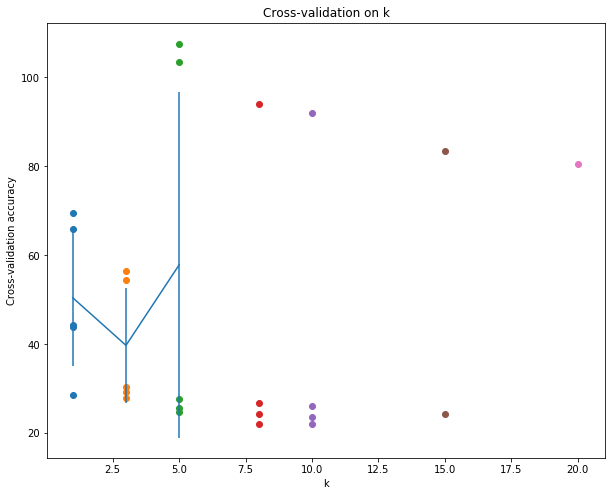

In [115]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

### retrain and test
- 选择 最好的 k-velue ，使用所有的训练集，重新训练分类器
然后 在测试集上评估准确率

In [118]:
best_k = 1

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000
